In [282]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [283]:
from height_tools import *

In [284]:
def height_analysis_wrapper(dirname,file_prefix,save_file=False,print_level=0,gaussian_width=8):

    maximum_intensity, mean_intensity, sum_intensity, max_bin_2d, max_bin_1d, max_y_1d_zoom,max_z_1d_zoom = ([] for i in range(7))
 
    pos_y = [] # to fit the y_position
    pos_z =[] # fitting the z_position
    CoM =[] # get the center of mass
    t_m = [] # threshold the picture and get the max    
    files = []
    [files.append(file_) for file_ in os.listdir(dirname) if file_.startswith(file_prefix) if file_.endswith('.npy')]

    for j in tqdm(range(len(files))):
        try:
            if(print_level==1):print(dirname + file_prefix +"%d.npy" %j)
            img = np.load(dirname + file_prefix +"%d.npy" %j)
            maximum_intensity.append(np.max(img))
            mean_intensity.append(np.mean(img))
            sum_intensity.append(np.sum(img))
            max_bin_2d.append(np.argmax(img))
            max_bin_1d.append(np.argmax(np.mean(img, axis=1)))    
            img2 = img.transpose()
            max_y_1d_zoom.append(np.argmax(np.mean(img[400:500],axis=0)))    
            max_z_1d_zoom.append(np.argmax(np.mean(img2[600:700],axis=0)))    
            pos_z.append(gaussian_bead_pos_fit(img,axis=0,up_lim_width=gaussian_width)[0])#,low_x_lim=550,up_x_lim=750,low_y_lim=420,up_y_lim=550,upper_area=1500,up_lim_width=10))
            pos_y.append(gaussian_bead_pos_fit(img,axis=1,up_lim_width=gaussian_width)[0])#,low_x_lim=550,up_x_lim=750,low_y_lim=420,up_y_lim=550,upper_area=1500,up_lim_width=10))    
            CoM.append(center_of_mass(img,np.max(img)/2))
            if(print_level==1):print("File %d successfully loaded" %j)
        except:print("File %d does not exist" %j)

    df = pd.DataFrame()
    df["center_of_mass"] = CoM
    df["height_from_fit"] = pos_z
    df["lateral_from_fit"] = pos_y
    df["max_intensity"] = maximum_intensity
    df["max_bin_2d"] = max_bin_2d
    df["sum_intensity"] = sum_intensity
    df["max_bin_height"] = max_bin_1d
    df["max_bin_lateral_ROI"] = max_y_1d_zoom
    df["max_bin_height_ROI"] = max_z_1d_zoom
    
    if(save_file==True):np.save(dirname+file_prefix+"height_wrapped.npy",df)
    return df

In [19]:
df = height_analysis_wrapper("/data/new_trap/20200306/Bead1/Shaking/Shaking368/Pictures_0/","Shaking0",gaussian_width=1)

100%|██████████| 102/102 [00:03<00:00, 28.73it/s]

File 101 does not exist


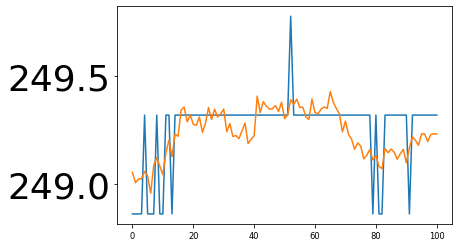

In [20]:
plt.plot(pixel_to_height(df["max_bin_height_ROI"]))
plt.plot(pixel_to_height(df["height_from_fit"]))

In [403]:
test = load_img_files("/home/data_transfer/data_from_windows/20200316/Bead1/HeightPictures/*")

/home/data_transfer/data_from_windows/20200316/Bead1/HeightPictures/after_filter.bmp
/home/data_transfer/data_from_windows/20200316/Bead1/HeightPictures/before_filter.bmp
/home/data_transfer/data_from_windows/20200316/Bead1/HeightPictures/zset_0.bmp
/home/data_transfer/data_from_windows/20200316/Bead1/HeightPictures/moved_shield_but_m13V_for_quick_check.bmp
/home/data_transfer/data_from_windows/20200316/Bead1/HeightPictures/quick_check_m14v.bmp
/home/data_transfer/data_from_windows/20200316/Bead1/HeightPictures/qucikcheck_m15v.bmp
/home/data_transfer/data_from_windows/20200316/Bead1/HeightPictures/quickcheck_m16V.bmp
/home/data_transfer/data_from_windows/20200316/Bead1/HeightPictures/quickcheck_m17V.bmp
/home/data_transfer/data_from_windows/20200316/Bead1/HeightPictures/quickcheck_m19V.bmp
/home/data_transfer/data_from_windows/20200316/Bead1/HeightPictures/zset_m500k.bmp
/home/data_transfer/data_from_windows/20200316/Bead1/HeightPictures/zset_m550k_afterspinnig.bmp
/home/data_transfer/

No handles with labels found to put in legend.


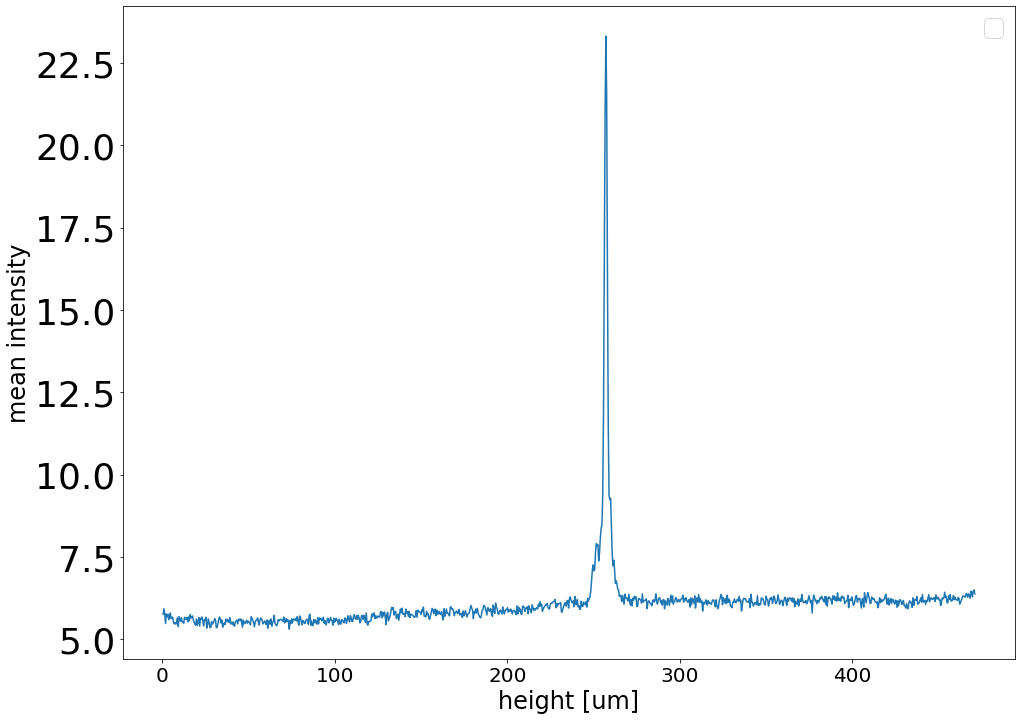

No handles with labels found to put in legend.


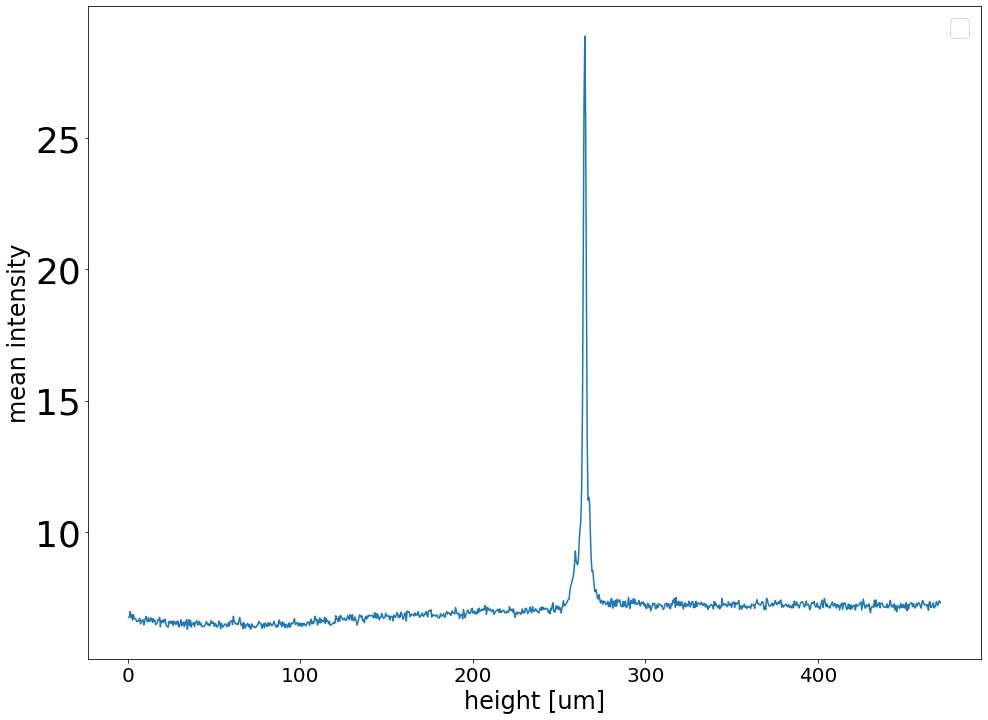

In [401]:
z = show_height_projection(test[5],low_lim=620,up_lim=720,pixel_or_height="height")
z2 = show_height_projection(test[4],low_lim=620,up_lim=720,pixel_or_height="height")


264.96000000000004


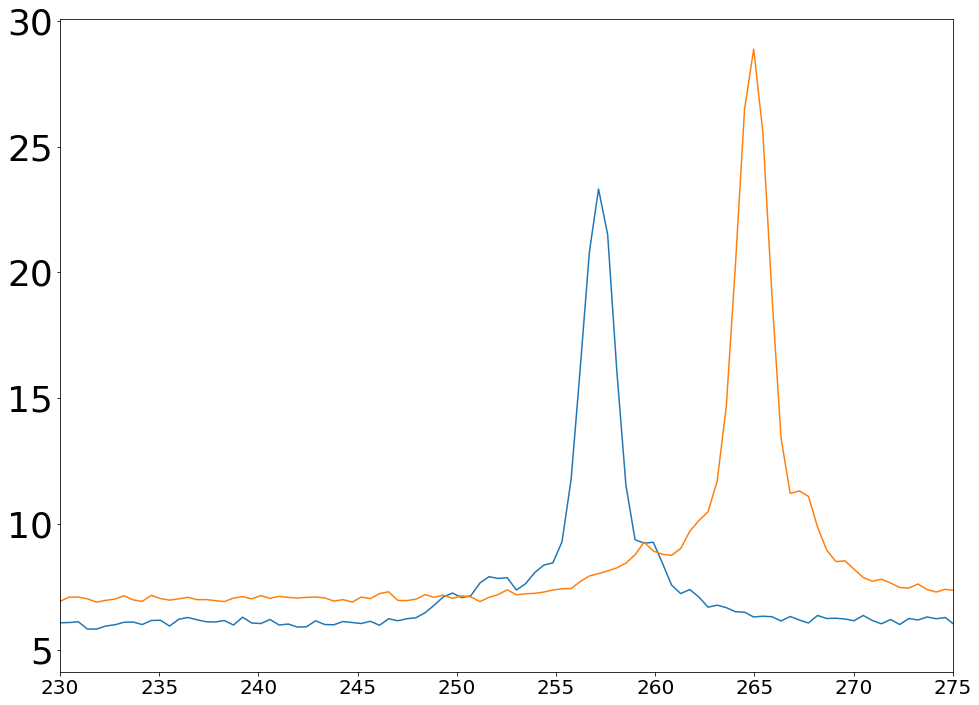

In [402]:
x = np.arange(0,1024*0.46,0.46)
plt.plot(1024*0.46-x,z)
plt.plot(1024*0.46-x,z2)

plt.xlim(230,275)
print(1024*0.46-np.argmax(z2)*0.46)

(670, 710)

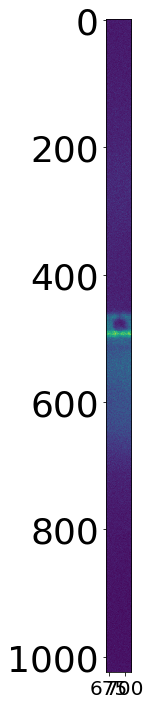

In [134]:
plt.imshow(test[6])
plt.xlim(670,710)

No handles with labels found to put in legend.


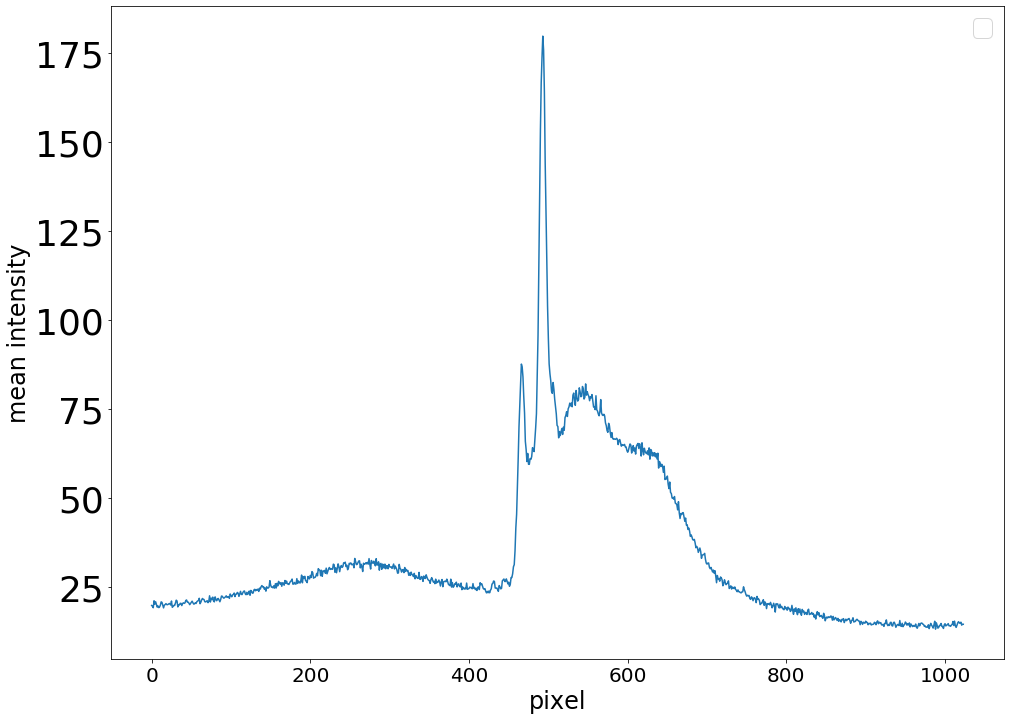

No handles with labels found to put in legend.


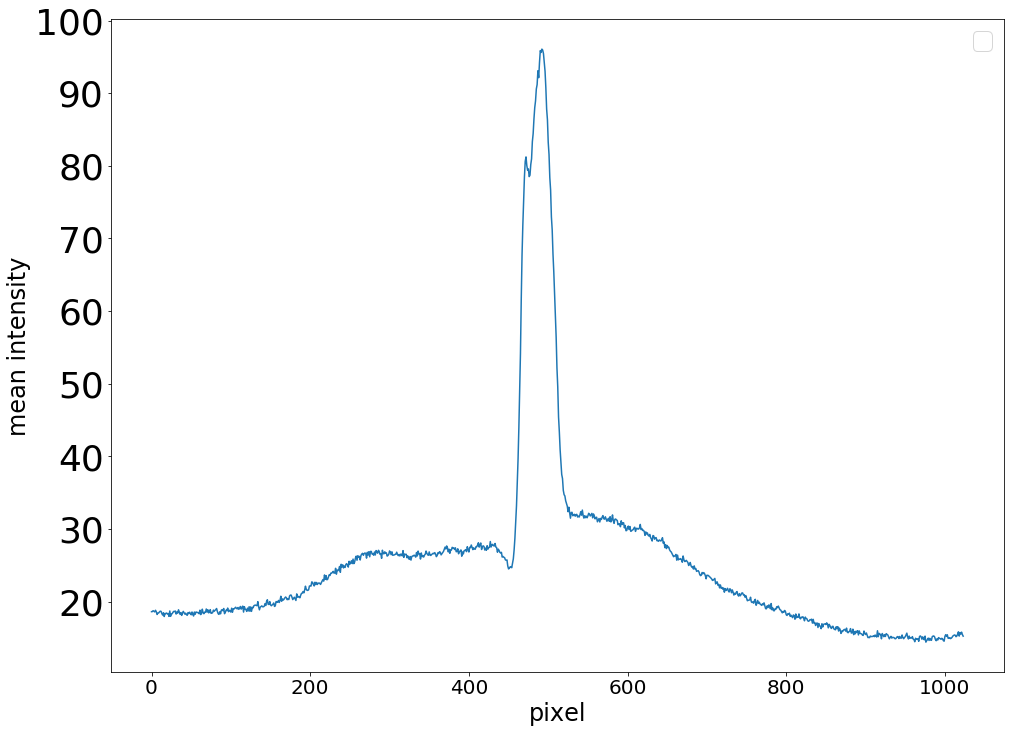

In [137]:
z = show_height_projection(test[6],low_lim=670,up_lim=710,pixel_or_height="pixel")
k = show_height_projection(test[6],low_lim=300,up_lim=650,pixel_or_height="pixel")



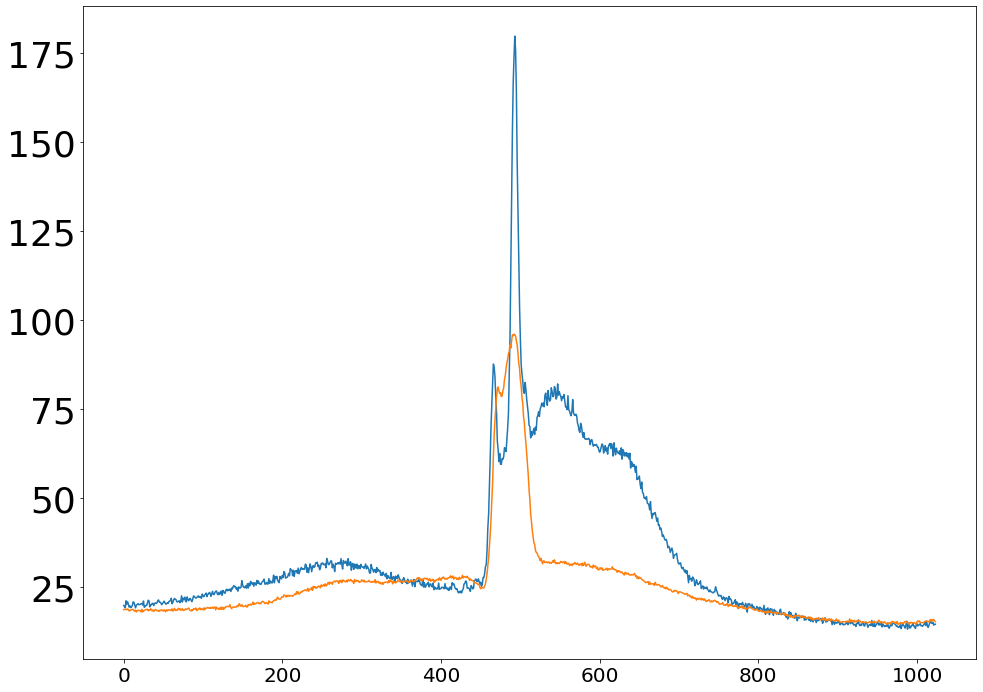

In [138]:
x= range(1024)#*0.46-np.arange(0,1024*0.46,0.46)
plt.plot(x,z)
plt.plot(x,k)



In [407]:
test_npy = load_npy_files("/data/new_trap/20200316/Bead1/Shaking/Shaking368/Pictures_0/Shaking0_0.npy")
#test_npy2 = load_npy_files("/data/new_trap/20200316/Bead1/Shaking/Shaking368/Pictures_0/Shaking1_0.npy")

/data/new_trap/20200316/Bead1/Shaking/Shaking368/Pictures_0/Shaking0_0.npy
/data/new_trap/20200316/Bead1/Shaking/Shaking368/Pictures_0/Shaking1_0.npy


(630, 710)

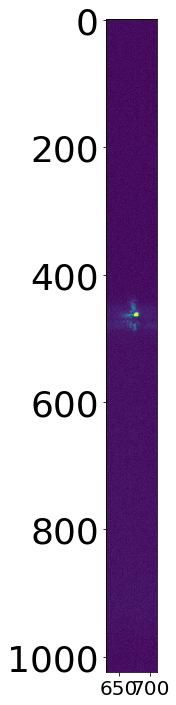

In [425]:
plt.imshow(test_npy[0])
plt.xlim(630,710)

No handles with labels found to put in legend.


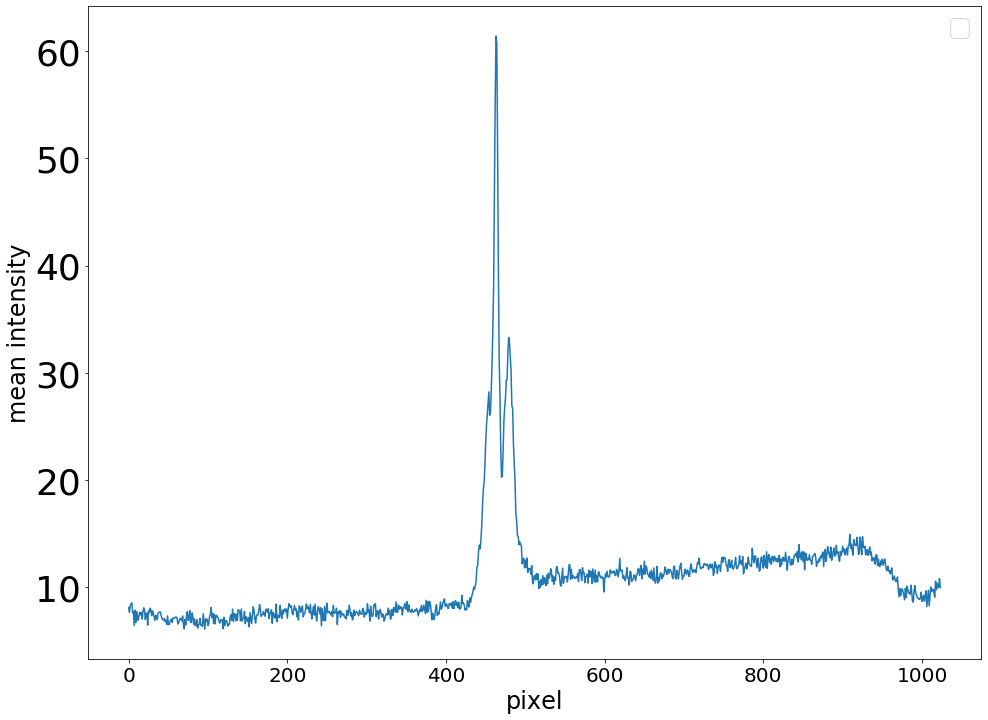

No handles with labels found to put in legend.


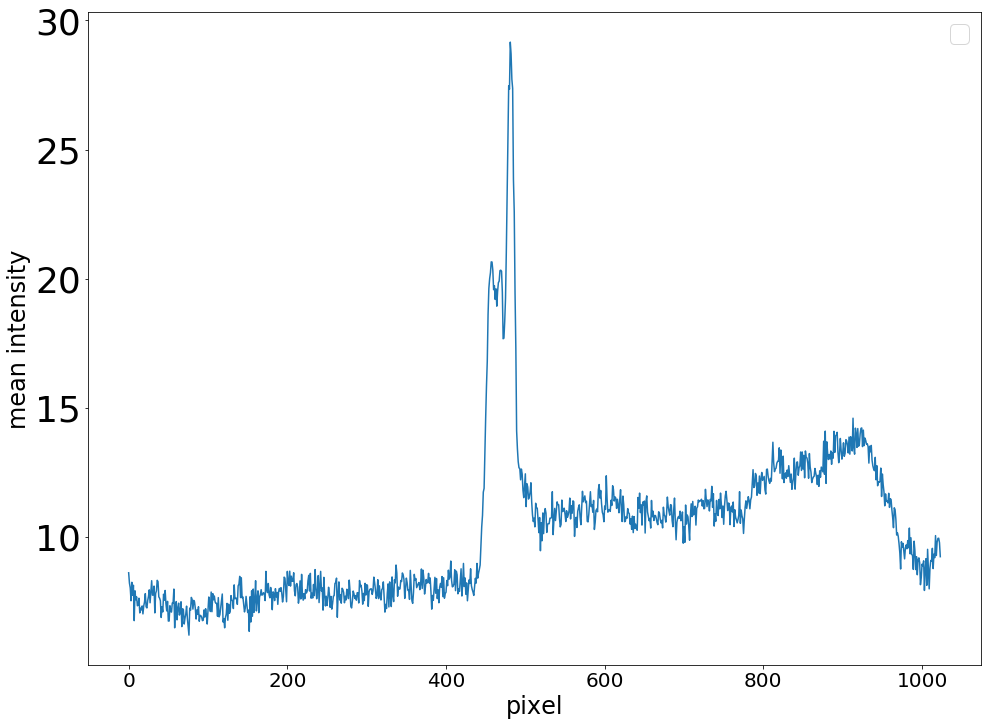

In [423]:
z = show_height_projection(test_npy[0],low_lim=630,up_lim=710,pixel_or_height="pixel")
k = show_height_projection(test_npy[0],low_lim=720,up_lim=850,pixel_or_height="pixel")


249.78


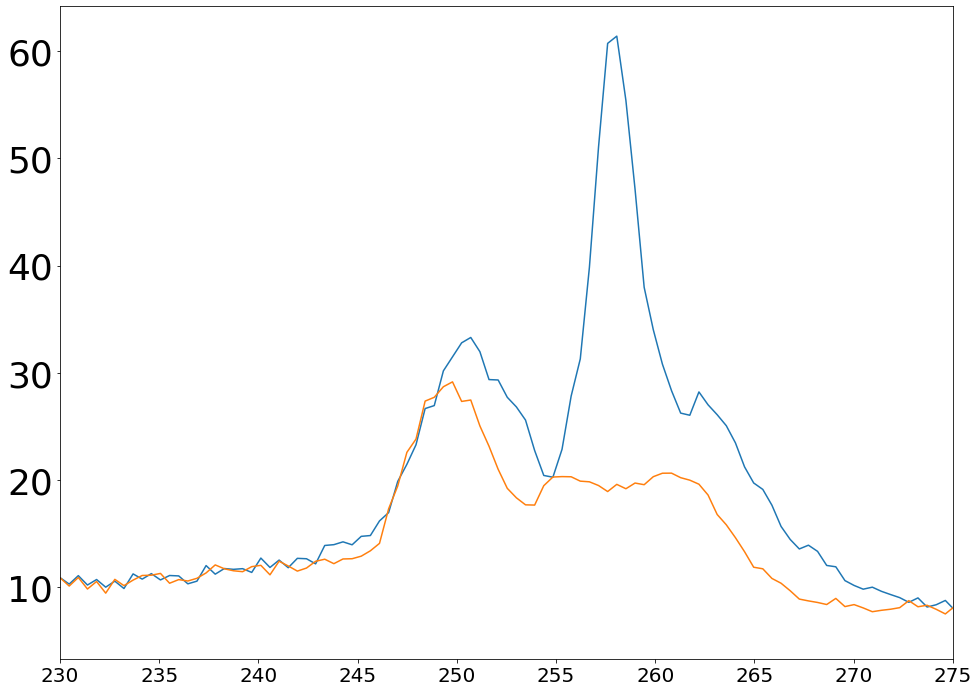

In [427]:
x = np.arange(0,1024*0.46,0.46)
plt.plot(1024*0.46-x,z)
plt.plot(1024*0.46-x,k)

plt.xlim(230,275)
print(1024*0.46-np.argmax(k)*0.46)